#### Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# importing the models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# importing performance measure functions

from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report

#### Load the dataset

In [ ]:
df_train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/SEM 3 project Solarflare/multilabel solar flare/M_training.csv")
df_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/SEM 3 project Solarflare/multilabel solar flare/M_testing.csv")

In [ ]:
print(df_train.shape)
print(df_test.shape)

(127709, 27)
(212, 27)


In [ ]:
df_train.columns.values

array(['label', 'flare', 'timestamp', 'NOAA', 'HARP', 'TOTUSJH',
       'TOTUSJZ', 'TOTPOT', 'TOTBSQ', 'USFLUX', 'Cdec', 'Chis1d', 'Chis',
       'AREA_ACR', 'SAVNCPP', 'ABSNJZH', 'Edec', 'Xmax1d', 'Mhis',
       'R_VALUE', 'Mdec', 'MEANPOT', 'Mhis1d', 'TOTFX', 'TOTFZ',
       'MEANSHR', 'SHRGT45'], dtype=object)

These 13 are SDO/HMI magnetic parameters. Their values of the AR samples are extracted from HMI SHARP related data products. The meaning of each parameter is as follows:
1) total unsigned current helicity (TOTUSJH).
2) total magnitude of Lorentz force (TOTBSQ).
3) total photospheric magnetic free energy density (TOTPOT).
4) total unsigned vertical current (TOTUSJZ).
5) absolute value of the net current helicity (ABSNJZH).
6) sum of the modulus of the net current per polarity (SAVNCPP).
7) total unsigned flux (USFLUX).
8) area of strong field pixels in the active region (AREA_ACR).
9) sum of z-component of Lorentz force (TOTFZ).
10) mean photospheric magnetic free energy (MEANPOT).
11) sum of flux near polarity inversion line (R_VALUE).
12) sum of z-component of normalized Lorentz force (EPSZ).
13) fraction of area with shear > 45◦ (SHRGT45).

In [ ]:
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127709 entries, 0 to 127708
Data columns (total 27 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   label      127709 non-null  object 
 1   flare      127709 non-null  object 
 2   timestamp  127709 non-null  object 
 3   NOAA       127709 non-null  int64  
 4   HARP       127709 non-null  int64  
 5   TOTUSJH    127709 non-null  float64
 6   TOTUSJZ    127709 non-null  float64
 7   TOTPOT     127709 non-null  float64
 8   TOTBSQ     127709 non-null  float64
 9   USFLUX     127709 non-null  float64
 10  Cdec       127709 non-null  float64
 11  Chis1d     127709 non-null  float64
 12  Chis       127709 non-null  float64
 13  AREA_ACR   127709 non-null  float64
 14  SAVNCPP    127709 non-null  float64
 15  ABSNJZH    127709 non-null  float64
 16  Edec       127709 non-null  float64
 17  Xmax1d     127709 non-null  float64
 18  Mhis       127709 non-null  float64
 19  R_VALUE    127709 non-n

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      212 non-null    object 
 1   flare      212 non-null    object 
 2   timestamp  212 non-null    object 
 3   NOAA       212 non-null    int64  
 4   HARP       212 non-null    int64  
 5   TOTUSJH    212 non-null    float64
 6   TOTUSJZ    212 non-null    float64
 7   TOTPOT     212 non-null    float64
 8   TOTBSQ     212 non-null    float64
 9   USFLUX     212 non-null    float64
 10  Cdec       212 non-null    float64
 11  Chis1d     212 non-null    float64
 12  Chis       212 non-null    float64
 13  AREA_ACR   212 non-null    float64
 14  SAVNCPP    212 non-null    float64
 15  ABSNJZH    212 non-null    float64
 16  Edec       212 non-null    float64
 17  Xmax1d     212 non-null    float64
 18  Mhis       212 non-null    float64
 19  R_VALUE    212 non-null    float64
 20  Mdec      

None

#### Defining a function for cleaning the flare class

In [ ]:
def clean_target(lst): 
    patt = '[0.0-9.9]'
    lst = [re.sub(patt, '', i) for i in lst] 
    return lst

In [ ]:
df_train['flare'] = pd.DataFrame(clean_target(list(df_train["flare"])))
df_test['flare'] = pd.DataFrame(clean_target(list(df_test["flare"])))

In [ ]:
df = pd.concat([df_train, df_test])
print(df.shape)
display(df.head())
display(df.tail())

(127921, 28)


,label,flare,timestamp,NOAA,HARP,TOTUSJH,TOTUSJZ,TOTPOT,TOTBSQ,USFLUX,Cdec,Chis1d,Chis,AREA_ACR,SAVNCPP,ABSNJZH,Edec,Xmax1d,Mhis,R_VALUE,Mdec,MEANPOT,Mhis1d,TOTFX,TOTFZ,MEANSHR,SHRGT45,Label
0,Negative,N,2010-05-03T05:34:22.60Z,11063,11,-0.567834,-0.125322,-0.578627,-0.439248,-0.712481,0.0,0.0,0.0,0.151492,-0.647307,-0.137107,0.0,0.0,0.0,1.355732,0.0,0.499024,0.0,-0.152851,0.585152,3.445284,1.203833,NaN
1,Negative,N,2010-05-03T06:34:22.60Z,11063,11,-0.571116,-0.195688,-0.593589,-0.444436,-0.714876,0.0,0.0,0.0,0.069468,-0.634164,-0.281029,0.0,0.0,0.0,0.703247,0.0,0.615338,0.0,-0.159401,0.524963,2.794116,0.692479,NaN
2,Negative,N,2010-05-03T07:34:22.60Z,11063,11,-0.559336,-0.160199,-0.591041,-0.450255,-0.714202,0.0,0.0,0.0,-0.059053,-0.628663,-0.210854,0.0,0.0,0.0,0.239942,0.0,0.443774,0.0,-0.154346,0.511524,3.236783,0.343284,NaN
3,Negative,N,2010-05-03T08:34:22.60Z,11063,11,-0.584086,-0.256048,-0.633434,-0.454481,-0.713703,0.0,0.0,0.0,0.006143,-0.632696,-0.366913,0.0,0.0,0.0,-0.059887,0.0,0.443193,0.0,-0.147237,0.505874,2.527372,0.223327,NaN
4,Negative,N,2010-05-03T09:34:22.60Z,11063,11,-0.574319,-0.275039,-0.626764,-0.452321,-0.710402,0.0,0.0,0.0,0.068967,-0.630944,-0.436362,0.0,0.0,0.0,-0.186871,0.0,0.493789,0.0,-0.148516,0.516957,2.274006,0.123323,NaN


,label,flare,timestamp,NOAA,HARP,TOTUSJH,TOTUSJZ,TOTPOT,TOTBSQ,USFLUX,Cdec,Chis1d,Chis,AREA_ACR,SAVNCPP,ABSNJZH,Edec,Xmax1d,Mhis,R_VALUE,Mdec,MEANPOT,Mhis1d,TOTFX,TOTFZ,MEANSHR,SHRGT45,Label
207,NaN,C,2015-04-13T15:34:18.70Z,12320,5415,0.947701,-0.229454,0.790858,0.109802,0.327207,0.317258,0.333333,0.241379,-0.369016,1.425262,0.890122,0.007516,0.006882,0.038462,-0.572136,0.000007,1.056751,0.0,-2.887877,-4.169643,0.185177,-0.496904,Negative
208,NaN,C,2015-04-13T16:34:18.70Z,12320,5415,0.945490,-0.256896,0.851387,0.127448,0.342463,0.291891,0.277778,0.241379,-0.406094,1.500688,0.606858,0.006915,0.006882,0.038462,-0.496255,0.000007,1.088738,0.0,-2.748850,-4.176686,0.161366,-0.434339,Negative
209,NaN,C,2015-04-13T17:34:18.70Z,12320,5415,0.826441,-0.314707,0.766035,0.110474,0.315568,0.268553,0.277778,0.241379,-0.430606,1.494396,0.652832,0.006362,0.006882,0.038462,-0.503343,0.000006,1.088156,0.0,-2.622375,-4.164119,0.130040,-0.451663,Negative
210,NaN,C,2015-04-13T18:34:18.70Z,12320,5415,0.944913,-0.175675,0.811451,0.161015,0.352947,0.247081,0.277778,0.241379,-0.320290,1.435140,1.110726,0.005853,0.006882,0.038462,-0.487871,0.000006,1.052099,0.0,-2.728068,-4.115928,0.212896,-0.464964,Negative
211,NaN,C,2015-04-13T19:34:18.80Z,12320,5415,0.959147,-0.067101,0.905028,0.203846,0.334539,0.227325,0.277778,0.241379,-0.298247,1.482046,0.945704,0.005385,0.006882,0.038462,-0.399229,0.000005,1.031744,0.0,-2.730263,-4.032418,0.266442,-0.394846,Negative


####  Rename & drop the unnecessary columns

In [ ]:
df = df.rename(columns = {"flare": "target"})

df.drop(["label","Label","timestamp", "NOAA", "HARP","Cdec","Chis","Edec","Chis1d","TOTFX","Xmax1d","Mhis","Mdec","Mhis1d","MEANSHR"],inplace = True, axis = 1)

In [ ]:
display(df.head())
display(df.tail())

,target,TOTUSJH,TOTUSJZ,TOTPOT,TOTBSQ,USFLUX,AREA_ACR,SAVNCPP,ABSNJZH,R_VALUE,MEANPOT,TOTFZ,SHRGT45
0,N,-0.567834,-0.125322,-0.578627,-0.439248,-0.712481,0.151492,-0.647307,-0.137107,1.355732,0.499024,0.585152,1.203833
1,N,-0.571116,-0.195688,-0.593589,-0.444436,-0.714876,0.069468,-0.634164,-0.281029,0.703247,0.615338,0.524963,0.692479
2,N,-0.559336,-0.160199,-0.591041,-0.450255,-0.714202,-0.059053,-0.628663,-0.210854,0.239942,0.443774,0.511524,0.343284
3,N,-0.584086,-0.256048,-0.633434,-0.454481,-0.713703,0.006143,-0.632696,-0.366913,-0.059887,0.443193,0.505874,0.223327
4,N,-0.574319,-0.275039,-0.626764,-0.452321,-0.710402,0.068967,-0.630944,-0.436362,-0.186871,0.493789,0.516957,0.123323


,target,TOTUSJH,TOTUSJZ,TOTPOT,TOTBSQ,USFLUX,AREA_ACR,SAVNCPP,ABSNJZH,R_VALUE,MEANPOT,TOTFZ,SHRGT45
207,C,0.947701,-0.229454,0.790858,0.109802,0.327207,-0.369016,1.425262,0.890122,-0.572136,1.056751,-4.169643,-0.496904
208,C,0.945490,-0.256896,0.851387,0.127448,0.342463,-0.406094,1.500688,0.606858,-0.496255,1.088738,-4.176686,-0.434339
209,C,0.826441,-0.314707,0.766035,0.110474,0.315568,-0.430606,1.494396,0.652832,-0.503343,1.088156,-4.164119,-0.451663
210,C,0.944913,-0.175675,0.811451,0.161015,0.352947,-0.320290,1.435140,1.110726,-0.487871,1.052099,-4.115928,-0.464964
211,C,0.959147,-0.067101,0.905028,0.203846,0.334539,-0.298247,1.482046,0.945704,-0.399229,1.031744,-4.032418,-0.394846


['N' 'B' 'C' 'M' 'X']


(array([96046.,     0., 11048.,     0.,     0., 17780.,     0.,  2750.,
            0.,   297.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

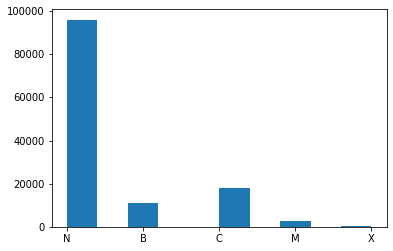

In [ ]:
target = pd.unique(df["target"])
print(target)

plt.hist(df["target"])

Text(0.5, 1.0, 'Correlation heatmap between the features')

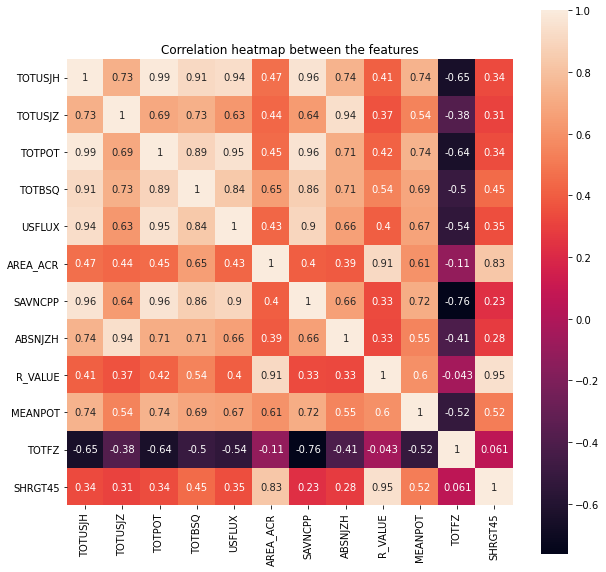

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot = True, square=True, ax = ax).set_title('Correlation heatmap between the features')

#### Splitting df_train into training & testing as df_test has low data

In [ ]:
y = df["target"]
df = df.drop(["target"], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y, stratify = y, test_size = 0.20, random_state = 5)
X_train.shape, X_test.shape 

((102336, 12), (25585, 12))

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
test_target = list(y_test)

## Now we will try some models

### Logistic regression

In [ ]:
logistic_regression = LogisticRegression().fit(X_train_scaled, y_train)
logistic_regression_predictions = logistic_regression.predict(X_test_scaled)

logistic_regression_score_test = logistic_regression.score(X_test_scaled, y_test)
logistic_regression_score_train = logistic_regression.score(X_train_scaled, y_train)

logistic_regression_confusion_matrix = confusion_matrix(y_test, logistic_regression_predictions, labels = ["B","C","M","N","X"])

logistic_regression_recall = recall_score(y_test, logistic_regression_predictions, labels = ["B","C","M","N","X"], average="weighted")

logistic_regression_f1_score = f1_score(y_test, logistic_regression_predictions, labels = ["B","C","M","N","X"], average="weighted")

logistic_regression_precision = precision_score(y_test, logistic_regression_predictions, labels = ["B","C","M","N","X"], average="weighted")

logistic_regression_report = classification_report(y_test, logistic_regression_predictions)

print("test score: ",logistic_regression_score_test,"\n", "train score:", logistic_regression_score_train)
print("Confusion matrix:\n", logistic_regression_confusion_matrix)
print("f1 score: ", logistic_regression_f1_score)
print("precision: ", logistic_regression_precision)
print("Recall", logistic_regression_recall)
print("Classification report:\n",logistic_regression_report)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



test score:  0.773031072894274 
 train score: 0.7729049405878674
Confusion matrix:
 [[    0   100     0  2110     0]
 [    0  1079    53  2424     0]
 [    0   337    77   136     0]
 [    0   582     6 18622     0]
 [    0    33    21     5     0]]
f1 score:  0.7152895976620067
precision:  0.6810791240067204
Recall 0.773031072894274
Classification report:
               precision    recall  f1-score   support

           B       0.00      0.00      0.00      2210
           C       0.51      0.30      0.38      3556
           M       0.49      0.14      0.22       550
           N       0.80      0.97      0.88     19210
           X       0.00      0.00      0.00        59

    accuracy                           0.77     25585
   macro avg       0.36      0.28      0.29     25585
weighted avg       0.68      0.77      0.72     25585



### K-Nearest Neighbours

In [ ]:
kneighbors_classifier = KNeighborsClassifier().fit(X_train_scaled, y_train)
kneighbors_predictions = kneighbors_classifier.predict(X_test_scaled)

kneighbors_score = kneighbors_classifier.score(X_test_scaled, y_test)
kneighbors_score_train = kneighbors_classifier.score(X_train_scaled, y_train)

kneighbors_classifier_confusion_matrix = confusion_matrix(y_test, kneighbors_predictions, labels = ["B","C","M","N","X"])

kneighbors_classifier_recall = recall_score(y_test, kneighbors_predictions, labels = ["B","C","M","N","X"], average="weighted")

kneighbors_classifier_f1_score = f1_score(y_test, kneighbors_predictions, labels = ["B","C","M","N","X"], average="weighted")

kneighbors_classifier_precision = precision_score(y_test, kneighbors_predictions, labels = ["B","C","M","N","X"], average="weighted")

KNN_report = classification_report(y_test, kneighbors_predictions)

print("test score: ",kneighbors_score,"\n", "train score:", kneighbors_score_train)
print("Confusion matrix:\n", kneighbors_classifier_confusion_matrix)
print("f1 score: ", kneighbors_classifier_f1_score)
print("precision: ", kneighbors_classifier_precision)
print("Recall", kneighbors_classifier_recall)
print("Classification report:\n",KNN_report)

test score:  0.8705882352941177 
 train score: 0.9032109912445279
Confusion matrix:
 [[ 1330   145     2   733     0]
 [  120  2784    47   605     0]
 [    6    59   449    32     4]
 [  319  1222     9 17660     0]
 [    0     6     2     0    51]]
f1 score:  0.8710206953720079
precision:  0.8743809198140293
Recall 0.8705882352941177
Classification report:
               precision    recall  f1-score   support

           B       0.75      0.60      0.67      2210
           C       0.66      0.78      0.72      3556
           M       0.88      0.82      0.85       550
           N       0.93      0.92      0.92     19210
           X       0.93      0.86      0.89        59

    accuracy                           0.87     25585
   macro avg       0.83      0.80      0.81     25585
weighted avg       0.87      0.87      0.87     25585



### Decision tree

In [ ]:
decision_tree_classifier = DecisionTreeClassifier().fit(X_train_scaled, y_train)
decision_tree_predictions = decision_tree_classifier.predict(X_test_scaled)

decision_tree_classifier_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions, labels = ["B","C","M","N","X"])

decision_tree_score = decision_tree_classifier.score(X_test_scaled, y_test)
decision_tree_score_train = decision_tree_classifier.score(X_train_scaled, y_train)

decision_tree_classifier_recall = recall_score(y_test, decision_tree_predictions, labels = ["B","C","M","N","X"], average="weighted")

decision_tree_classifier_f1score = f1_score(y_test, decision_tree_predictions, labels = ["B","C","M","N","X"], average="weighted")

decision_tree_classifier_precision = precision_score(y_test, decision_tree_predictions, labels = ["B","C","M","N","X"], average="weighted")

decision_tree_report = classification_report(y_test, decision_tree_predictions)

print("test score: ",decision_tree_score,"\n", "train score:", decision_tree_score_train)
print("Confusion matrix:\n", decision_tree_classifier_confusion_matrix)
print("f1 score: ", decision_tree_classifier_f1score)
print("precision: ", decision_tree_classifier_precision)
print("Recall", decision_tree_classifier_recall)
print("Classification report:\n",decision_tree_report)

test score:  0.8292749658002736 
 train score: 0.9880100844277674
Confusion matrix:
 [[ 1093   215    10   892     0]
 [  192  2259    78  1018     9]
 [   15    68   385    76     6]
 [  887   838    47 17436     2]
 [    0     7     3     5    44]]
f1 score:  0.8281700628527126
precision:  0.827237987534546
Recall 0.8292749658002736
Classification report:
               precision    recall  f1-score   support

           B       0.50      0.49      0.50      2210
           C       0.67      0.64      0.65      3556
           M       0.74      0.70      0.72       550
           N       0.90      0.91      0.90     19210
           X       0.72      0.75      0.73        59

    accuracy                           0.83     25585
   macro avg       0.70      0.70      0.70     25585
weighted avg       0.83      0.83      0.83     25585



### Random forest Classifier

In [ ]:
random_forest_classifier = RandomForestClassifier().fit(X_train_scaled, y_train)
random_forest_predictions = random_forest_classifier.predict(X_test_scaled)

random_forest_classifier_confusion_matrix = confusion_matrix(y_test, random_forest_predictions, labels = ["B","C","M","N","X"])

random_forest_score = random_forest_classifier.score(X_test_scaled, y_test)
random_forest_score_train = random_forest_classifier.score(X_train_scaled, y_train)

random_forest_classifier_recall = recall_score(y_test, random_forest_predictions, labels = ["B","C","M","N","X"], average="weighted")

random_forest_classifier_f1score = f1_score(y_test, random_forest_predictions, labels = ["B","C","M","N","X"], average="weighted")

random_forest_classifier_precision = precision_score(y_test, random_forest_predictions, labels = ["B","C","M","N","X"], average="weighted")

random_forest_report = classification_report(y_test, random_forest_predictions)

print("test score: ",random_forest_score,"\n", "train score:", random_forest_score_train)
print("Confusion matrix:\n", random_forest_classifier_confusion_matrix)
print("f1 score: ", random_forest_classifier_f1score)
print("precision: ", random_forest_classifier_precision)
print("Recall", random_forest_classifier_recall)
print("Classification report:\n",random_forest_report)

test score:  0.8975571623998436 
 train score: 0.9880100844277674
Confusion matrix:
 [[ 1027    70     1  1112     0]
 [   37  2469    15  1035     0]
 [    3    53   445    47     2]
 [   72   162     3 18973     0]
 [    0     1     4     4    50]]
f1 score:  0.8881541041939315
precision:  0.8979803834020356
Recall 0.8975571623998436
Classification report:
               precision    recall  f1-score   support

           B       0.90      0.46      0.61      2210
           C       0.90      0.69      0.78      3556
           M       0.95      0.81      0.87       550
           N       0.90      0.99      0.94     19210
           X       0.96      0.85      0.90        59

    accuracy                           0.90     25585
   macro avg       0.92      0.76      0.82     25585
weighted avg       0.90      0.90      0.89     25585



### Adaptive boosting

In [ ]:
adaboost_classifier = AdaBoostClassifier().fit(X_train_scaled, y_train)
adaboost_classifier_predictions = adaboost_classifier.predict(X_test_scaled)

adaboost_classifier_confusion_matrix = confusion_matrix(y_test, adaboost_classifier_predictions, labels = ["B","C","M","N","X"])

adaboost_classifier_score = adaboost_classifier.score(X_test_scaled, y_test)
adaboost_classifier_score_train = adaboost_classifier.score(X_train_scaled, y_train)

adaboost_classifier_recall = recall_score(y_test, adaboost_classifier_predictions, labels = ["B","C","M","N","X"], average="weighted")

adaboost_classifier_f1score = f1_score(y_test, adaboost_classifier_predictions, labels = ["B","C","M","N","X"], average="weighted")

adaboost_classifier_precision = precision_score(y_test, adaboost_classifier_predictions, labels = ["B","C","M","N","X"], average="weighted")

adaboost_classifier_report = classification_report(y_test, adaboost_classifier_predictions)

print("test score: ",adaboost_classifier_score,"\n", "train score:", adaboost_classifier_score_train)
print("Confusion matrix:\n", adaboost_classifier_confusion_matrix)
print("f1 score: ", adaboost_classifier_f1score)
print("precision: ", adaboost_classifier_precision)
print("Recall", adaboost_classifier_recall)

print("Classification report:\n",adaboost_classifier_report)

test score:  0.7464139144029704 
 train score: 0.750234521575985
Confusion matrix:
 [[  100   246     0  1864     0]
 [  127  1045    53  2274    57]
 [   31   295    21   160    43]
 [  235  1028    19 17928     0]
 [    0    48     2     6     3]]
f1 score:  0.7042187257266067
precision:  0.682375110811198
Recall 0.7464139144029704
Classification report:
               precision    recall  f1-score   support

           B       0.20      0.05      0.07      2210
           C       0.39      0.29      0.34      3556
           M       0.22      0.04      0.07       550
           N       0.81      0.93      0.87     19210
           X       0.03      0.05      0.04        59

    accuracy                           0.75     25585
   macro avg       0.33      0.27      0.28     25585
weighted avg       0.68      0.75      0.70     25585



#### Gradient Boosting

In [ ]:
gradient_boost_classifier = GradientBoostingClassifier().fit(X_train_scaled, y_train)
gradient_boost_classifier_predictions = gradient_boost_classifier.predict(X_test_scaled)

gradient_boost_classifier_confusion_matrix = confusion_matrix(y_test, gradient_boost_classifier_predictions, labels = ["B","C","M","N","X"])

gradient_boost_classifier_score = gradient_boost_classifier.score(X_test_scaled, y_test)
gradient_boost_classifier_score_train = gradient_boost_classifier.score(X_train_scaled, y_train)

gradient_boost_classifier_recall = recall_score(y_test, gradient_boost_classifier_predictions, labels = ["B","C","M","N","X"], average="weighted")

gradient_boost_classifier_f1score = f1_score(y_test, gradient_boost_classifier_predictions, labels = ["B","C","M","N","X"], average="weighted")

gradient_boost_classifier_precision = precision_score(y_test, gradient_boost_classifier_predictions, labels = ["B","C","M","N","X"], average="weighted")

gradient_boost_report = classification_report(y_test, gradient_boost_classifier_predictions)

print("test score: ",gradient_boost_classifier_score,"\n", "train score:", gradient_boost_classifier_score_train)
print("Confusion matrix:\n", gradient_boost_classifier_confusion_matrix)
print("f1 score: ", gradient_boost_classifier_f1score)
print("precision: ", gradient_boost_classifier_precision)
print("Recall", gradient_boost_classifier_recall)
print("Classification report:\n",gradient_boost_report)

test score:  0.7926519444987298 
 train score: 0.7991909005628518
Confusion matrix:
 [[   36   122     1  2051     0]
 [    9  1282    43  2221     1]
 [    0   254   165   129     2]
 [    3   415    13 18778     1]
 [    0    29     7     4    19]]
f1 score:  0.7410752244112693
precision:  0.7751113768828299
Recall 0.7926519444987298
Classification report:
               precision    recall  f1-score   support

           B       0.75      0.02      0.03      2210
           C       0.61      0.36      0.45      3556
           M       0.72      0.30      0.42       550
           N       0.81      0.98      0.89     19210
           X       0.83      0.32      0.46        59

    accuracy                           0.79     25585
   macro avg       0.74      0.40      0.45     25585
weighted avg       0.78      0.79      0.74     25585



###  Support Vector Classifier

In [ ]:
SV_classifier = SVC().fit(X_train_scaled, y_train)
SV_predictions = SV_classifier.predict(X_test_scaled)
SV_score = SV_classifier.score(X_test_scaled, y_test)
SV_score_train = SV_classifier.score(X_train_scaled, y_train)

SV_classifier_confusion_matrix = confusion_matrix(y_test, SV_predictions, labels = ["B","C","M","N","X"])

SV_classifier_recall = recall_score(y_test, SV_predictions, labels = ["B","C","M","N","X"], average="weighted")

SV_classifier_f1_score = f1_score(y_test, SV_predictions, labels = ["B","C","M","N","X"], average="weighted")

SV_classifier_precision = precision_score(y_test, SV_predictions, labels = ["B","C","M","N","X"], average="weighted")

SV_classifier_report = classification_report(y_test, SV_predictions)

print("test score: ",SV_score,"\n", "train score:", SV_score_train)
print("Confusion matrix:\n", SV_classifier_confusion_matrix)
print("f1 score: ", SV_classifier_f1_score)
print("precision: ", SV_classifier_precision)
print("Recall", SV_classifier_recall)
print("Classification score:\n", SV_classifier_report)

test score:  0.7923392612859097 
 train score: 0.7951649468417761
Confusion matrix:
 [[    4    85     2  2119     0]
 [    0  1164    23  2368     1]
 [    0   241   164   142     3]
 [    3   277     9 18921     0]
 [    0    29     6     5    19]]
f1 score:  0.735585168732001
precision:  0.7617439015580554
Recall 0.7923392612859097
Classification score:
               precision    recall  f1-score   support

           B       0.57      0.00      0.00      2210
           C       0.65      0.33      0.43      3556
           M       0.80      0.30      0.44       550
           N       0.80      0.98      0.88     19210
           X       0.83      0.32      0.46        59

    accuracy                           0.79     25585
   macro avg       0.73      0.39      0.44     25585
weighted avg       0.76      0.79      0.74     25585



######  checking how many predictions are correct

In [ ]:
# logistic regression

list_logistic = list(logistic_regression_predictions)

cnt = 0
for i in range(len(test_target)):
    if list_logistic[i] == test_target[i]:
        cnt = cnt + 1
print(cnt)

19778


In [ ]:
# K-Nearest Neighbors classifier

list_knn = list(kneighbors_predictions)

cnt = 0
for i in range(len(test_target)):
    if list_knn[i] == test_target[i]:
        cnt = cnt + 1
print(cnt)

22274


In [ ]:
# Decision tree classifier

list_decision_tree = list(decision_tree_predictions)

cnt = 0
for i in range(len(test_target)):
    if list_decision_tree[i] == test_target[i]:
        cnt = cnt + 1
print(cnt)

21217


In [ ]:
# Random Forest Classifier

list_random = list(random_forest_predictions)

cnt = 0
for i in range(len(test_target)):
    if list_random[i] == test_target[i]:
        cnt = cnt + 1
print(cnt)

22964


In [ ]:
#  Adaboost classifier

list_adaboost = list(adaboost_classifier_predictions)

cnt = 0
for i in range(len(test_target)):
    if list_adaboost[i] == test_target[i]:
        cnt = cnt + 1
print(cnt)

19097


In [ ]:
#  Gradientboost classifier

list_gradient = list(gradient_boost_classifier_predictions)

cnt = 0
for i in range(len(test_target)):
    if list_gradient[i] == test_target[i]:
        cnt = cnt + 1
print(cnt)

20280


In [ ]:
# Support Vector Machine Classifier

list_svc = list(SV_predictions)

cnt = 0
for i in range(len(test_target)):
    if list_svc[i] == test_target[i]:
        cnt = cnt + 1
print(cnt)

20272


##Comparison table for different algorithms

In [ ]:
fig = go.Figure(data=[go.Table(header=dict(values=['Algorithms', 'Test Accuracy','Precision','Recall','f1 score']),
                 cells=dict(values=[['Logistic Regression','K-nearest neighbors','Support Vector Classifier','Decision tree','Random forest','Adaptive boosting','Gradient boosting'],
                                    [logistic_regression_score_test,kneighbors_score,SV_score,decision_tree_score,random_forest_score,adaboost_classifier_score,gradient_boost_classifier_score],
                                    [logistic_regression_precision,kneighbors_classifier_precision,SV_classifier_precision,decision_tree_classifier_precision,random_forest_classifier_precision,adaboost_classifier_precision,gradient_boost_classifier_precision],
                                    [logistic_regression_recall,kneighbors_classifier_recall,SV_classifier_recall,decision_tree_classifier_recall,random_forest_classifier_recall,adaboost_classifier_recall,gradient_boost_classifier_recall],
                                    [logistic_regression_f1_score,kneighbors_classifier_f1_score,SV_classifier_f1_score,decision_tree_classifier_f1score,random_forest_classifier_f1score,adaboost_classifier_f1score,gradient_boost_classifier_f1score]
                                    ]))
                      ])                     
fig.show()

## Comparison Scatter Plot for different Algorithms

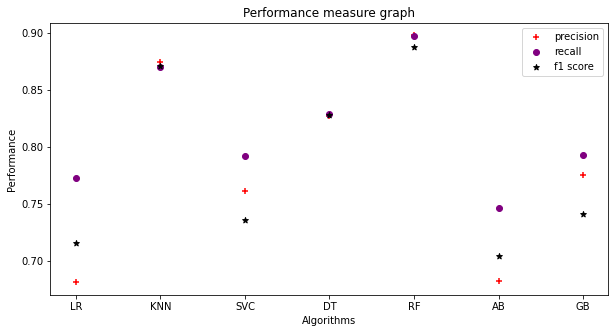

In [ ]:
X = ['LR','KNN','SVC','DT','RF','AB','GB']
precision = [logistic_regression_precision,kneighbors_classifier_precision,SV_classifier_precision,decision_tree_classifier_precision,random_forest_classifier_precision,adaboost_classifier_precision,gradient_boost_classifier_precision]
recall_ = [logistic_regression_recall,kneighbors_classifier_recall,SV_classifier_recall,decision_tree_classifier_recall,random_forest_classifier_recall,adaboost_classifier_recall,gradient_boost_classifier_recall]
f1 = [logistic_regression_f1_score,kneighbors_classifier_f1_score,SV_classifier_f1_score,decision_tree_classifier_f1score,random_forest_classifier_f1score,adaboost_classifier_f1score,gradient_boost_classifier_f1score]

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.title("Performance measure graph")
plt.xlabel("Algorithms")
plt.ylabel("Performance")
ax.scatter(X,precision,c='red',marker='+', label = 'precision')
ax.scatter(X,recall_,c= 'purple', label = 'recall')
ax.scatter(X, f1,c = 'black', marker = '*', label = 'f1 score')
plt.legend()
plt.show()

## Bar plot for F1 Score

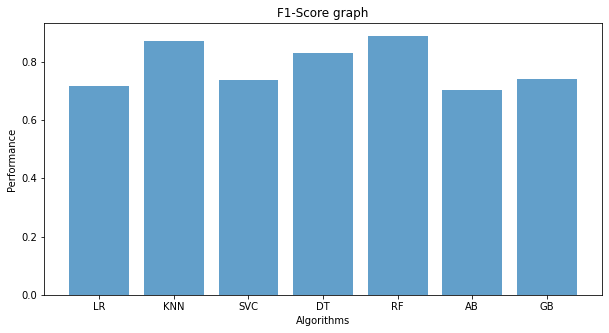

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.title("F1-Score graph")
plt.xlabel("Algorithms")
plt.ylabel("Performance")
ax.bar(X, f1, align='center', alpha=0.7)

plt.show()

## Bar plot for precision

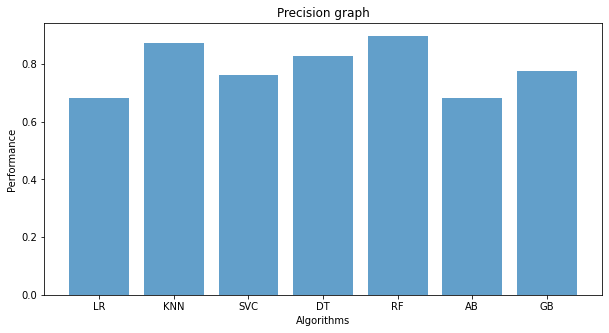

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.title("Precision graph")
plt.xlabel("Algorithms")
plt.ylabel("Performance")
ax.bar(X, precision, align='center', alpha=0.7)

plt.show()

#### Making prediction on a randomly selected datapoints

## Bar plot for Recall

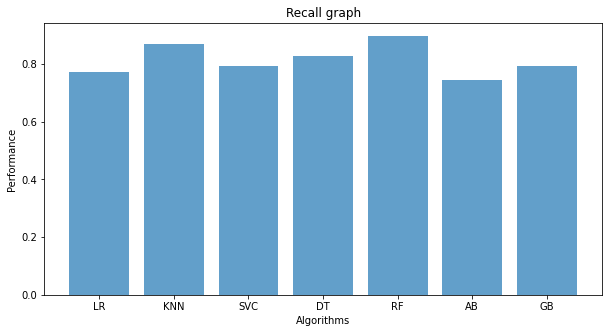

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
plt.title("Recall graph")
plt.xlabel("Algorithms")
plt.ylabel("Performance")
ax.bar(X, recall_, align='center', alpha=0.7)

plt.show()

#Testing the models on test dataset

In [ ]:
input_test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/SEM 3 project Solarflare/M_testing_input.csv")
print(input_test.shape)
display(input_test.head(3))
#input_test.isnull().any()

(59, 27)


,Label,flare,timestamp,NOAA,HARP,TOTUSJH,TOTUSJZ,TOTPOT,TOTBSQ,USFLUX,Cdec,Chis1d,Chis,AREA_ACR,SAVNCPP,ABSNJZH,Edec,Xmax1d,Mhis,R_VALUE,Mdec,MEANPOT,Mhis1d,TOTFX,TOTFZ,MEANSHR,SHRGT45
0,Negative,B6.6,2015-04-06T19:34:17.70Z,12320,5415,0.829165,0.194284,1.022818,0.167146,1.131635,0.119756,0.111111,0.034483,-0.106377,0.775296,0.466728,0.003346,0.003226,0.0,0.225641,0.0,0.853201,0.0,2.260590,-0.424243,0.509301,0.278585
1,Negative,B6.6,2015-04-06T20:34:17.70Z,12320,5415,0.769663,0.148384,0.948129,0.165071,1.124376,0.110181,0.111111,0.034483,-0.154267,0.806186,0.594247,0.003079,0.003226,0.0,0.092246,0.0,0.874719,0.0,2.177428,-0.502534,0.459525,0.190485
2,Negative,C1.0,2015-04-04T17:34:17.40Z,12320,5415,0.467316,-0.260086,0.482809,-0.112756,0.200802,0.000000,0.000000,0.000000,-0.479449,0.711112,-0.083101,0.001508,0.000925,0.0,-0.458036,0.0,1.126540,0.0,2.642107,-3.182923,0.206148,-0.473586


In [ ]:
input_test["flare"] = pd.DataFrame(clean_target(list(input_test["flare"])))
list_flare = list(input_test["flare"])
print(list_flare)

['B', 'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'M', 'M', 'M', 'M', 'N', 'N', 'N', 'N', 'C', 'C', 'C', 'C', 'C', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'X', 'N', 'N', 'N', 'N', 'N', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']


In [ ]:
input_test.drop(["Label","flare","timestamp", "NOAA", "HARP","Cdec","Chis","Edec","Chis1d","TOTFX","Xmax1d","Mhis","Mdec","Mhis1d","MEANSHR"],inplace = True, axis = 1)
display(input_test.head(3))

,TOTUSJH,TOTUSJZ,TOTPOT,TOTBSQ,USFLUX,AREA_ACR,SAVNCPP,ABSNJZH,R_VALUE,MEANPOT,TOTFZ,SHRGT45
0,0.829165,0.194284,1.022818,0.167146,1.131635,-0.106377,0.775296,0.466728,0.225641,0.853201,-0.424243,0.278585
1,0.769663,0.148384,0.948129,0.165071,1.124376,-0.154267,0.806186,0.594247,0.092246,0.874719,-0.502534,0.190485
2,0.467316,-0.260086,0.482809,-0.112756,0.200802,-0.479449,0.711112,-0.083101,-0.458036,1.126540,-3.182923,-0.473586


In [ ]:
input_scaled = scaler.transform(input_test)

### Test on Logistic Regression Model

In [ ]:
predictions_logistic = logistic_regression.predict(input_scaled)
print(predictions_logistic)
print("\n Total true predictions using logistic Regression")
listlogistic = list(predictions_logistic)
cnt = 0
for i in range(len(list_flare)):
    if listlogistic[i] == list_flare[i]:
        cnt = cnt + 1
print(cnt)

['N' 'N' 'N' 'N' 'C' 'C' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'C'
 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'C' 'C' 'N' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'M' 'M' 'M' 'M' 'C' 'C' 'X' 'X' 'M' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N']

 Total true predictions using logistic Regression
18


###Test on K-nearest neighbor model

In [ ]:
predictions_KNN = kneighbors_classifier.predict(input_scaled)
print(predictions_KNN)
print("\n Total true predictions")
listKNN = list(predictions_KNN)
cnt = 0
for i in range(len(list_flare)):
    if listKNN[i] == list_flare[i]:
        cnt = cnt + 1
print(cnt)

['C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'M' 'M' 'M' 'M'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'N' 'N' 'N' 'N' 'N' 'N' 'B' 'N'
 'N' 'N' 'N' 'N' 'N']

 Total true predictions
43


### Test on SVC model

In [ ]:
predictions_SVC = SV_classifier.predict(input_scaled)
print(predictions_SVC)
print("\n Total true predictions using SVC")
listSVC = list(predictions_SVC)
cnt = 0
for i in range(len(list_flare)):
    if listSVC[i] == list_flare[i]:
        cnt = cnt + 1
print(cnt)

['N' 'N' 'C' 'C' 'C' 'C' 'N' 'C' 'N' 'N' 'N' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'C' 'C' 'N' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'M'
 'M' 'X' 'X' 'X' 'X' 'C' 'C' 'X' 'X' 'X' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N']

 Total true predictions using SVC
29


### Test on Decision tree model

In [ ]:
predictions_DT = decision_tree_classifier.predict(input_scaled)
print(predictions_DT)
print("\n Total true predictions")
listDT = list(predictions_DT)
cnt = 0
for i in range(len(list_flare)):
    if listDT[i] == list_flare[i]:
        cnt = cnt + 1
print(cnt)

['B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'M' 'M' 'M' 'M'
 'N' 'C' 'B' 'N' 'C' 'C' 'C' 'M' 'C' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'C' 'X'
 'X' 'X' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'N' 'N' 'N' 'N' 'N' 'B' 'B' 'B'
 'N' 'B' 'B' 'B' 'B']

 Total true predictions
53


### Test on Random Forest model

In [ ]:
predictions_RFC = random_forest_classifier.predict(input_scaled)
print(predictions_RFC)
print("\n Total true predictions")
lstR = list(predictions_RFC)
cnt = 0
for i in range(len(list_flare)):
    if lstR[i] == list_flare[i]:
        cnt = cnt + 1
print(cnt)

['B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'M' 'M' 'M' 'M'
 'N' 'C' 'N' 'N' 'C' 'C' 'C' 'C' 'C' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'X'
 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'X' 'N' 'N' 'N' 'N' 'N' 'B' 'B' 'B'
 'N' 'B' 'B' 'B' 'B']

 Total true predictions
57


### Test on Adaptive Boosting

In [ ]:
predictions_AB = adaboost_classifier.predict(input_scaled)
print(predictions_AB)
print("\n Total true predictions")
listAB = list(predictions_AB)
cnt = 0
for i in range(len(list_flare)):
    if listAB[i] == list_flare[i]:
        cnt = cnt + 1
print(cnt)

['N' 'N' 'C' 'C' 'N' 'N' 'B' 'C' 'C' 'N' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'C' 'C' 'N' 'C' 'N' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'N' 'C' 'C' 'C' 'C' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N']

 Total true predictions
22


### Test on Gradient bossting

In [ ]:
predictions_GB = gradient_boost_classifier.predict(input_scaled)
print(predictions_GB)
print("\n Total true predictions")
listGB = list(predictions_GB)
cnt = 0
for i in range(len(list_flare)):
    if listGB[i] == list_flare[i]:
        cnt = cnt + 1
print(cnt)

['N' 'N' 'C' 'C' 'C' 'C' 'C' 'C' 'N' 'C' 'C' 'N' 'N' 'N' 'C' 'C' 'C' 'C'
 'N' 'N' 'N' 'N' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'X'
 'C' 'X' 'X' 'X' 'X' 'C' 'X' 'X' 'X' 'X' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N']

 Total true predictions
31
